In [1]:
from google.colab import files

# Upload the Kaggle API key JSON file that you obtained from your Kaggle account
uploaded = files.upload()

# Move the uploaded file to the appropriate directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!pip install kaggle

In [ ]:
# Downloading the dataset using the Kaggle API
!kaggle datasets download -d mdismielhossenabir/psychosocial-dimensions-of-student-life

In [ ]:
# Unzip the downloaded dataset
!unzip psychosocial-dimensions-of-student-life.zip

In [6]:
## Data Analysis Phase
## MAin aim is to understand more about the data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
dataset=pd.read_csv('/content/CSE_student_performances.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(99, 10)


In [8]:
## print the top5 records
dataset.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes


In [9]:
# Get information about the dataset (data types, non-null counts, memory usage, etc.)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   99 non-null     int64  
 1   Gender                                99 non-null     object 
 2   AcademicPerformance                   99 non-null     object 
 3   TakingNoteInClass                     99 non-null     object 
 4   DepressionStatus                      99 non-null     object 
 5   FaceChallangesToCompleteAcademicTask  99 non-null     object 
 6   LikePresentation                      99 non-null     object 
 7   SleepPerDayHours                      99 non-null     int64  
 8   NumberOfFriend                        95 non-null     float64
 9   LikeNewThings                         99 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.9+ KB


In [10]:
# Generate summary statistics for numerical columns
dataset.describe()

,Age,SleepPerDayHours,NumberOfFriend
count,99.000000,99.000000,95.000000
mean,22.515152,6.717172,16.189474
std,1.560767,1.738169,25.397811
min,20.000000,4.000000,0.000000
25%,21.000000,5.000000,3.000000
50%,23.000000,7.000000,6.000000
75%,24.000000,8.000000,15.000000
max,25.000000,12.000000,100.000000


In [11]:
## Here we will check the percentage of nan values present in each feature
## Make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

## Print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), '%   missing values')

NumberOfFriend 0.0404 %   missing values


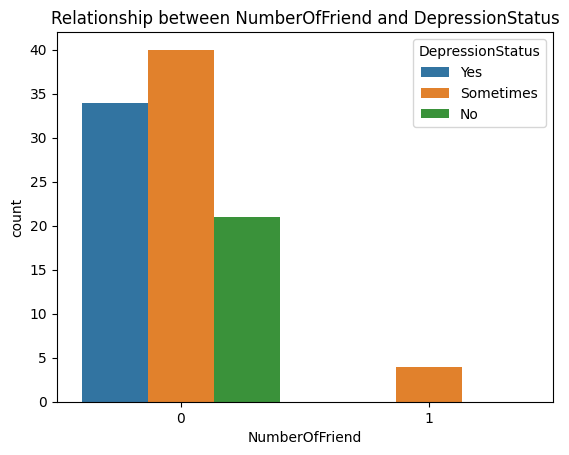

In [15]:
##Visualize Missing Data
# Visualize the relationship between missing values and the target variable (DepressionStatus)
for feature in features_with_na:
    data = dataset.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the count of each category in DepressionStatus where the information is missing or present
    sns.countplot(x=feature, hue='DepressionStatus', data=data)
    plt.title(f"Relationship between {feature} and DepressionStatus")
    plt.show()

there seems to be some relationship between missing values in the Number of friends feature and the distribution of "DepressionStatus" categories, especially in the "Sometimes" category.

When the selected feature has missing values (x-axis: 1), the distribution is dominated by the "Sometimes" category in "DepressionStatus," but the count is lower compared to the cases where data is present.

In [16]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# Display the first few records of numerical variables
dataset[numerical_features].head()

Number of numerical variables:  3


,Age,SleepPerDayHours,NumberOfFriend
0,23,12,NaN
1,23,8,80.0
2,24,8,10.0
3,20,5,15.0
4,24,5,2.0


In [19]:
# List of discrete variables (few unique values)
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [20]:
discrete_feature

['Age ', 'SleepPerDayHours']

In [21]:
dataset[discrete_feature].head()

,Age,SleepPerDayHours
0,23,12
1,23,8
2,24,8
3,20,5
4,24,5


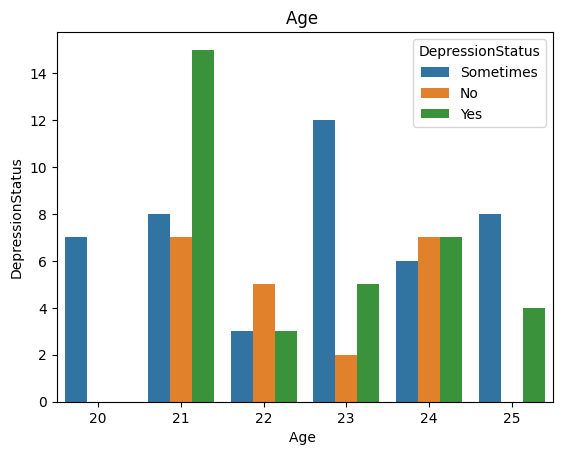

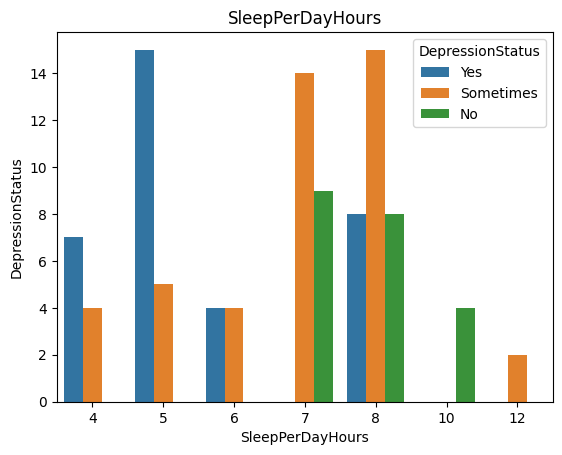

In [22]:
## Visualize the relationship between discrete variables and depression status

for feature in discrete_feature:
    data=dataset.copy()
    sns.countplot(x=feature, hue='DepressionStatus', data=dataset)
    plt.xlabel(feature)
    plt.ylabel('DepressionStatus')
    plt.title(feature)
    plt.show()

In [23]:
# List of continuous variables (many unique values)

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


In [24]:
continuous_feature

['NumberOfFriend']

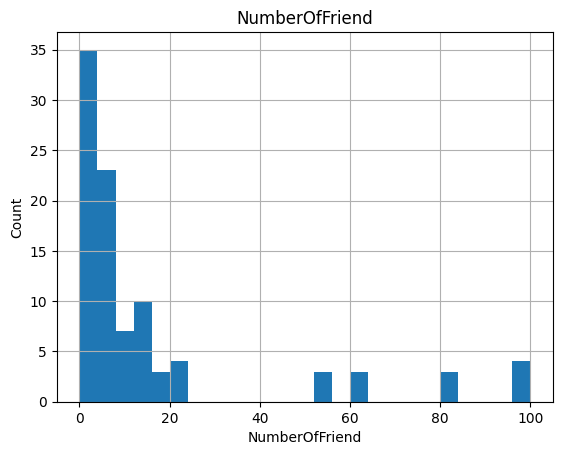

In [25]:
## Analyze the distribution of continuous variables using histograms

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

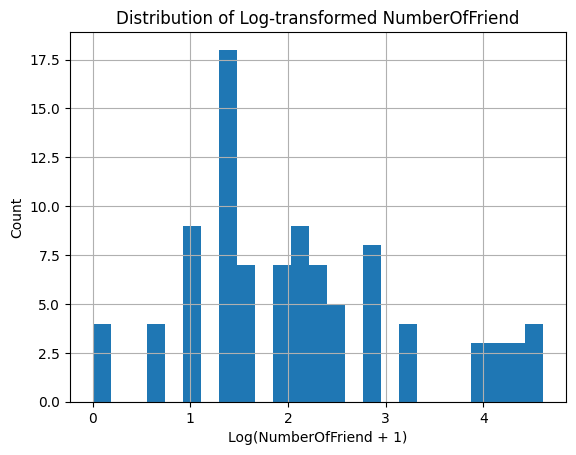

In [26]:
## Apply logarithmic transformation to continuous variables

for feature in continuous_feature:
    data = dataset.copy()

    # Apply logarithmic transformation (adding a small constant to avoid issues with zero values)
    data[feature] = np.log1p(data[feature])

    # Plot the histogram of the transformed feature
    data[feature].hist(bins=25)
    plt.xlabel(f"Log({feature} + 1)")
    plt.ylabel("Count")
    plt.title(f"Distribution of Log-transformed {feature}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


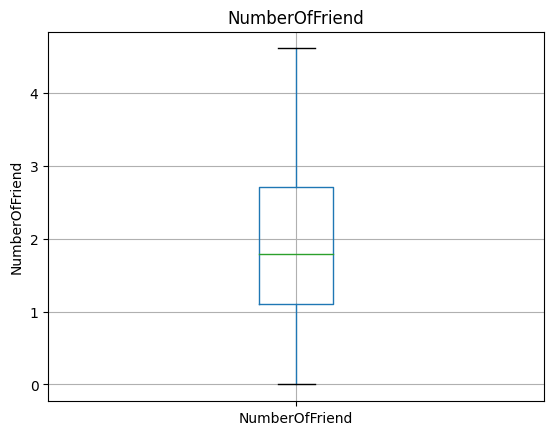

In [30]:
# Display boxplots for transformed continuous variables

for feature in continuous_feature:
    data=dataset.copy()
    # print(data[feature].unique())
    # if 0 in data[feature].unique():
    #     pass
    # else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [31]:
# List of categorical variables

categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['Gender',
 'AcademicPerformance',
 'TakingNoteInClass',
 'DepressionStatus',
 'FaceChallangesToCompleteAcademicTask',
 'LikePresentation',
 'LikeNewThings']

In [32]:
dataset[categorical_features].head()

,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,LikeNewThings
0,Male,Average,No,Sometimes,Yes,Yes,Yes
1,Male,Excellent,Sometimes,Yes,No,Yes,Yes
2,Male,Average,No,Sometimes,Sometimes,No,Yes
3,Female,Good,Yes,Sometimes,Yes,No,Yes
4,Female,Average,Yes,Yes,Yes,Yes,Yes


In [33]:
# Explore the unique values of categorical variables

for feature in categorical_features:
    print('{} - {} - {}'.format(feature,len(dataset[feature].unique()),dataset[feature].unique()))

Gender - 2 - ['Male' 'Female']
AcademicPerformance - 4 - ['Average' 'Excellent' 'Good' 'Below average']
TakingNoteInClass - 3 - ['No' 'Sometimes' 'Yes']
DepressionStatus - 3 - ['Sometimes' 'Yes' 'No']
FaceChallangesToCompleteAcademicTask - 3 - ['Yes' 'No' 'Sometimes']
LikePresentation - 2 - ['Yes' 'No']
LikeNewThings - 2 - ['Yes' 'No']


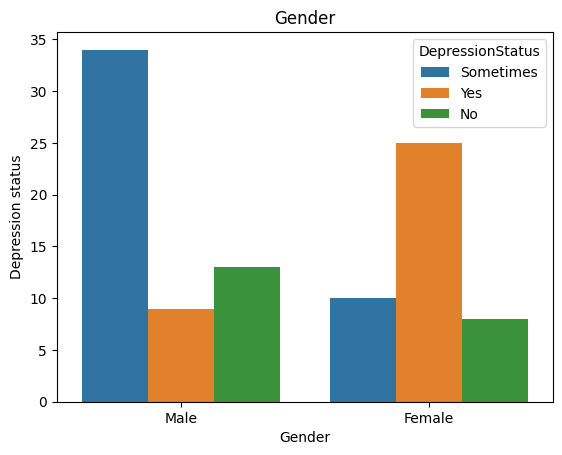

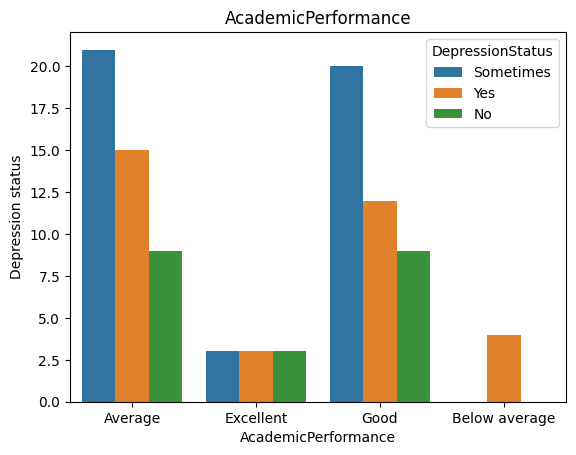

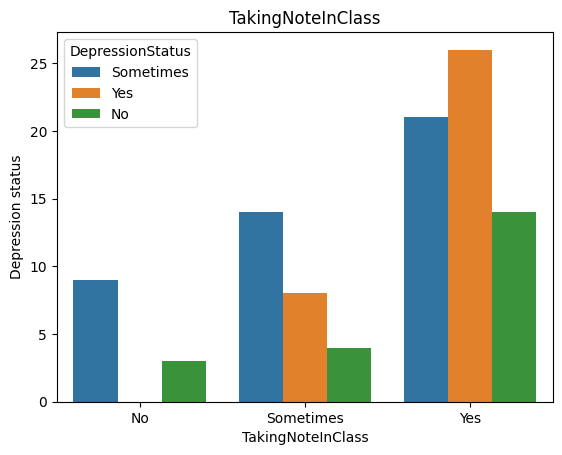

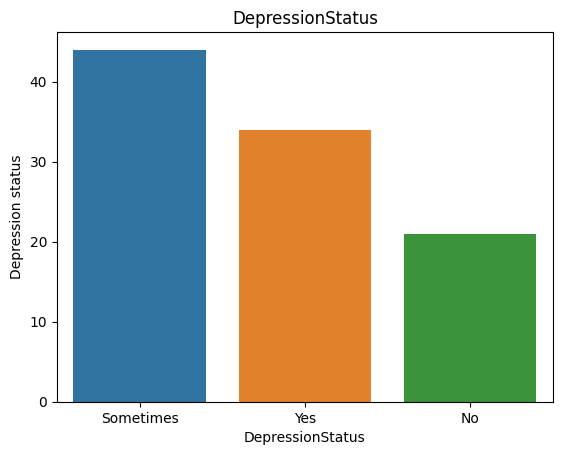

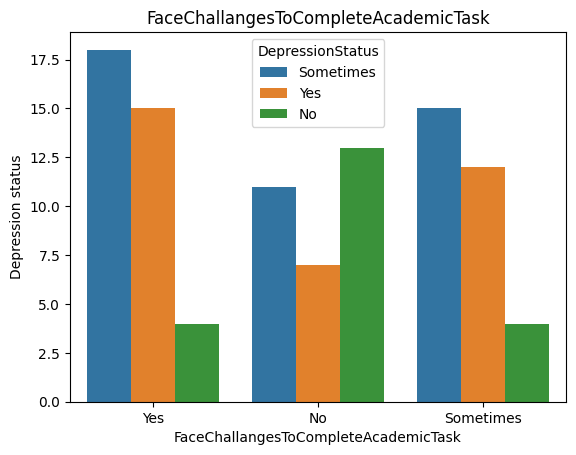

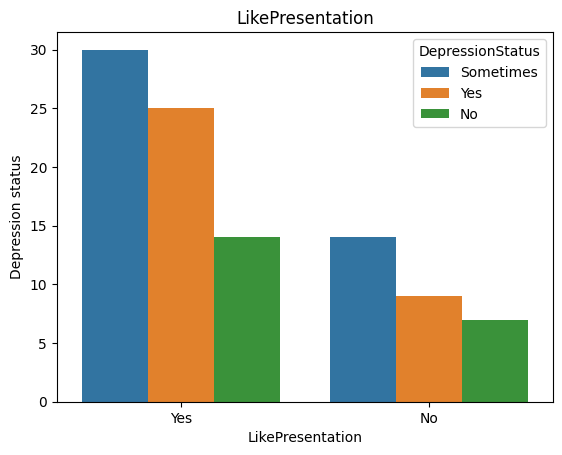

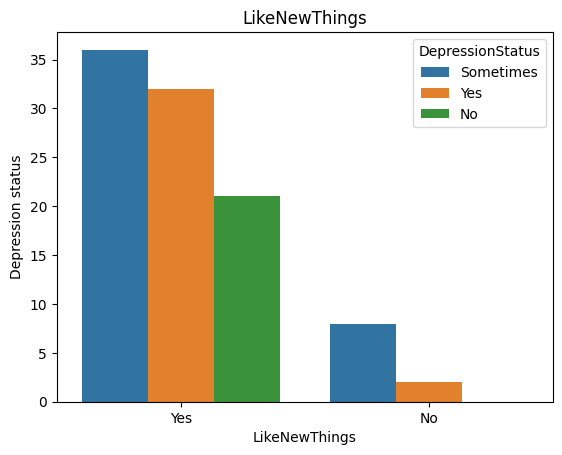

In [34]:
## Analyze the Relationship between Categorical Variables and depression status

for feature in categorical_features:
    data=dataset.copy()
    sns.countplot(x=feature, hue='DepressionStatus', data=dataset)
    plt.xlabel(feature)
    plt.ylabel('Depression status')
    plt.title(feature)
    plt.show()

In [36]:
## Identify categorical features with missing values
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 and dataset[feature].dtypes=='O']
print(features_nan)
# Print the percentage of missing values for each categorical feature.
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

[]


In [37]:
## Identify numerical features with missing values.
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
print(numerical_with_nan)
# Print the numerical features with missing values and the percentage of missing values.
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

['NumberOfFriend']
NumberOfFriend: 0.0404% missing value


In [38]:
## Replacing Missing Numerical Values

for feature in numerical_with_nan:
    # Replace missing values with the median since there might be outliers.
    median_value=dataset[feature].median()

    # Create a new feature to indicate missing values (1 for missing, 0 for not missing).
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)

    # Fill missing values with the median.
    dataset[feature].fillna(median_value,inplace=True)

# Verify if there are any remaining missing values in numerical features.
dataset[numerical_with_nan].isnull().sum()

NumberOfFriend    0
dtype: int64

In [39]:
dataset.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings,NumberOfFriendnan
0,23,Male,Average,No,Sometimes,Yes,Yes,12,6.0,Yes,1
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes,0
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes,0
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes,0
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes,0


In [43]:
# Reduce the cardinality of categorical features by replacing rare labels with 'RareVar'.
for feature in categorical_features:
    temp=dataset.groupby(feature)['DepressionStatus'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'RareVar')

In [44]:
dataset.head(99)

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings,NumberOfFriendnan
0,23,Male,Average,No,Sometimes,Yes,Yes,12,1.026672,Yes,1
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,1.683065,Yes,0
2,24,Male,Average,No,Sometimes,Sometimes,No,8,1.194706,Yes,0
3,20,Female,Good,Yes,Sometimes,Yes,No,5,1.310506,Yes,0
4,24,Female,Average,Yes,Yes,Yes,Yes,5,0.526589,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
94,21,Male,Good,Yes,Sometimes,Yes,Yes,6,0.869742,Yes,0
95,21,Female,Good,Yes,Yes,No,Yes,6,1.026672,Yes,0
96,25,Male,Good,Yes,Sometimes,No,Yes,4,1.162283,No,0
97,21,Male,Good,Yes,No,Sometimes,No,10,1.419607,Yes,0


In [46]:
from sklearn.preprocessing import LabelEncoder

for feature in categorical_features:
    label_encoder = LabelEncoder()
    dataset[feature] = label_encoder.fit_transform(dataset[feature])

In [47]:
label_mapping = {feature: dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))) for feature in categorical_features}

# Print the label mappings
print("Label Mappings:")
print(label_mapping)

Label Mappings:
{'Gender': {'No': 0, 'Yes': 1}, 'AcademicPerformance': {'No': 0, 'Yes': 1}, 'TakingNoteInClass': {'No': 0, 'Yes': 1}, 'DepressionStatus': {'No': 0, 'Yes': 1}, 'FaceChallangesToCompleteAcademicTask': {'No': 0, 'Yes': 1}, 'LikePresentation': {'No': 0, 'Yes': 1}, 'LikeNewThings': {'No': 0, 'Yes': 1}}


In [48]:
## Scale the numerical features using Min-Max scaling.

scaling_feature=[feature for feature in dataset.columns if feature not in ['DepressionStatus'] ]
len(scaling_feature)

10

In [49]:
scaling_feature

['Age ',
 'Gender',
 'AcademicPerformance',
 'TakingNoteInClass',
 'FaceChallangesToCompleteAcademicTask',
 'LikePresentation',
 'SleepPerDayHours',
 'NumberOfFriend',
 'LikeNewThings',
 'NumberOfFriendnan']

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[scaling_feature])

MinMaxScaler()

In [53]:
# Create a new DataFrame with scaled features.

data = pd.concat([dataset[['DepressionStatus']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [54]:
data.head()

,DepressionStatus,Age,Gender,AcademicPerformance,TakingNoteInClass,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings,NumberOfFriendnan
0,1,0.6,1.0,0.000000,0.0,1.0,1.0,1.000,0.595625,1.0,1.0
1,2,0.6,1.0,0.666667,0.5,0.0,1.0,0.500,0.976432,1.0,0.0
2,1,0.8,1.0,0.000000,0.0,0.5,0.0,0.500,0.693110,1.0,0.0
3,1,0.0,0.0,1.000000,1.0,1.0,0.0,0.125,0.760291,1.0,0.0
4,2,0.8,0.0,0.000000,1.0,1.0,1.0,0.125,0.305501,1.0,0.0


In [55]:
# Save the preprocessed dataset to a CSV file.

data.to_csv('/content/student_performance_final.csv',index=False)

In [56]:
## The main aim is to select the most relevant features for the model

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [57]:
dataset=pd.read_csv('/content/student_performance_final.csv')

In [58]:
dataset.head()

,DepressionStatus,Age,Gender,AcademicPerformance,TakingNoteInClass,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings,NumberOfFriendnan
0,1,0.6,1.0,0.000000,0.0,1.0,1.0,1.000,0.595625,1.0,1.0
1,2,0.6,1.0,0.666667,0.5,0.0,1.0,0.500,0.976432,1.0,0.0
2,1,0.8,1.0,0.000000,0.0,0.5,0.0,0.500,0.693110,1.0,0.0
3,1,0.0,0.0,1.000000,1.0,1.0,0.0,0.125,0.760291,1.0,0.0
4,2,0.8,0.0,0.000000,1.0,1.0,1.0,0.125,0.305501,1.0,0.0


In [59]:
# Capture the dependent feature (target variable).
y_train=dataset[['DepressionStatus']]

In [60]:
# Drop the dependent feature from the dataset to create the feature matrix.
X_train=dataset.drop(['DepressionStatus'],axis=1)

In [67]:
# First, specify the Lasso Regression model and choose an appropriate alpha (penalty parameter).
# Higher alpha values lead to fewer selected features.

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# Fit the model to the data to select the features with non-zero coefficients.
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [68]:
# Let's print the number of total and selected features.
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 10
selected features: 8
features with coefficients shrank to zero: 2


In [69]:
selected_feat

Index(['Age ', 'Gender', 'AcademicPerformance', 'TakingNoteInClass',
       'FaceChallangesToCompleteAcademicTask', 'SleepPerDayHours',
       'NumberOfFriend', 'NumberOfFriendnan'],
      dtype='object')

In [70]:
# Create a list of selected features.
X_train=X_train[selected_feat]

In [71]:
X_train.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,FaceChallangesToCompleteAcademicTask,SleepPerDayHours,NumberOfFriend,NumberOfFriendnan
0,0.6,1.0,0.000000,0.0,1.0,1.000,0.595625,1.0
1,0.6,1.0,0.666667,0.5,0.0,0.500,0.976432,0.0
2,0.8,1.0,0.000000,0.0,0.5,0.500,0.693110,0.0
3,0.0,0.0,1.000000,1.0,1.0,0.125,0.760291,0.0
4,0.8,0.0,0.000000,1.0,1.0,0.125,0.305501,0.0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
# Split the data into training and testing sets using k-fold cross-validation.

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [74]:
# Initialize the Random Forest Regressor model.
model1 = RandomForestRegressor(n_estimators=100, random_state=42)

In [75]:
# Train the model on the training data.
model1.fit(X_train, y_train)

<ipython-input-75-8fe592c8779e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [76]:
# Make predictions on the testing data.
y_pred = model1.predict(X_test)

In [77]:
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [78]:
# Print the evaluation metrics.
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print('R-squared (R2) Score:', r2)

Mean Squared Error:  0.16775500000000002
Mean Absolute Error:  0.22849999999999998
R-squared (R2) Score: 0.6893425925925926


In [79]:
# Initialize the Linear Regression model.
model2 = LinearRegression()

In [81]:
# Train the model on the training data.
model2.fit(X_train, y_train)

LinearRegression()

In [82]:
# Make predictions on the test data.
y_pred2 = model2.predict(X_test)

In [83]:
# Calculate the evaluation metrics
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)

In [84]:
# Print the evaluation metrics.
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print('R-squared (R2) Score:', r2)

Mean Squared Error:  0.16775500000000002
Mean Absolute Error:  0.22849999999999998
R-squared (R2) Score: 0.6893425925925926
